In [1]:
import pandas as pd

import xlrd
xlrd.__VERSION__

file = r'eCO2mix_RTE_Annuel-Definitif_2017.xlsx'

#book = xlrd.open_workbook(file)
#print("The number of worksheets is", book.nsheets)
#print("Worksheet name(s):", book.sheet_names())

df = pd.read_excel(file)

In [2]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 36 columns):
Perimetre                               35041 non-null object
Nature                                  35041 non-null object
Date                                    35040 non-null object
Heures                                  35040 non-null object
Consommation                            17520 non-null float64
Pr�vision J-1                           35040 non-null float64
Pr�vision J                             35040 non-null float64
Fioul                                   17520 non-null float64
Charbon                                 17520 non-null float64
Gaz                                     17520 non-null float64
Nucleaire                               17520 non-null float64
Eolien                                  17520 non-null float64
Solaire                                 17520 non-null float64
Hydraulique                             17520 non-null float64
Pompage      

In [3]:

df2 = df.set_index('Date', inplace=False)

#df2.info(verbose=True)
print(df2)
df.plot(x='Date', y='Eolien')



                                                    Perimetre  \
Date                                                            
2017-01-01                                             France   
2017-01-01                                             France   
2017-01-01                                             France   
2017-01-01                                             France   
2017-01-01                                             France   
2017-01-01                                             France   
2017-01-01                                             France   
2017-01-01                                             France   
2017-01-01                                             France   
2017-01-01                                             France   
2017-01-01                                             France   
2017-01-01                                             France   
2017-01-01                                             France   
2017-01-01               

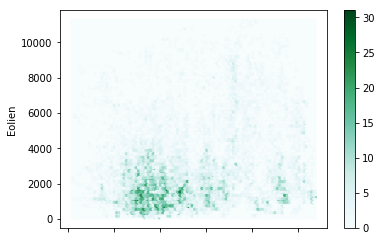

In [4]:
df.plot.hexbin(x='Nucleaire', y='Eolien', gridsize=100)